In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import statsmodels.api as sm
import os

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

def colormap():
    # colors
    cdict = ['#01437D','#EB7E21', '#9FACB4', '#FBDA11', '#669FD6']#, '#D7D9D6']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')
MY_CMAP = colormap()

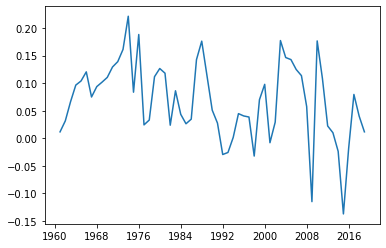

In [32]:
FILE_PATH = r"C:\Users\Administrator\Documents\dataOpen\datasets_full\datasets_full"
FILE_DIR = os.path.dirname(FILE_PATH)
FILE_DATA_PATH = os.path.join(FILE_DIR, r"datasets_full")
ENC = "ISO-8859-1"
INDX = pd.IndexSlice

gdp_path = os.path.join(FILE_DATA_PATH, "Vancouver\gdp_word_bank.csv")
gdp_data = pd.read_csv(gdp_path, encoding = ENC, header = 2)
gdp_data.set_index("Country Name", inplace = True)
gdp_data.head()

canada = gdp_data.loc["Canada", "1960":"2019"]
cgr = canada.pct_change()
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.plot(cgr)

In [33]:
for city in os.listdir(FILE_DATA_PATH):
    sub_file = os.path.join(FILE_DATA_PATH, city)
    for table in os.listdir(sub_file):
        table_path = os.path.join(sub_file, table)
        tt = pd.read_csv(table_path, encoding = ENC)
        print(city, " :", table, " : \n", tt.head(5), "\n")

NotADirectoryError: [WinError 267] 目录名称无效。: 'C:\\Users\\Administrator\\Documents\\dataOpen\\datasets_full\\datasets_full\\.DS_Store'

# Load GDP

In [34]:
gdp_path = os.path.join(FILE_DATA_PATH, "Vancouver\gdp_word_bank.csv")
gdp_data = pd.read_csv(gdp_path, encoding = ENC, header = 2)
gdp_data.set_index("Country Name", inplace = True)
gdp_data.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10,NaN
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,9.463542e+10,NaN
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10,NaN
Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN


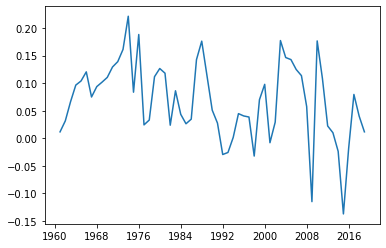

In [35]:
canada = gdp_data.loc["Canada", "1960":"2019"]
cgr = canada.pct_change()
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.plot(cgr)

# Load Business Size

In [36]:
import os
bs_path = os.path.join(FILE_DATA_PATH, "Vancouver/vancouver_business_size.csv")
vbs = pd.read_csv(bs_path, encoding = ENC)
vbs = vbs.loc[vbs.region_code.str.startswith("D")] #filter all RD

business_type_mapping=dict()
for s in vbs["business_type"].unique():
    business_type_mapping[s]=s
business_type_mapping['Accom. & Food Services']='Accommodation & Food Services'
business_type_mapping['Admin. & Sup\'rt, Waste Mgmt.']='Admin. & Support, Waste Mgmt. & Remedtn.'
business_type_mapping['Agric., Forestry, Fishing & Hunt']='Agriculture, Forestry, Fishing & Hunting'
business_type_mapping['Information & Cultural Indust.']='Information & Cultural Industries'
business_type_mapping['Mgmt. of Companies & Enter.']='Management of Companies & Enterprises'
business_type_mapping['Mining & Oil & Gas Extract.']='Mining & Oil & Gas Extraction'
business_type_mapping['Other Serv\'s (ex. Public Admin.)']='Other Services (excl. Public Administration)'
business_type_mapping['Profes\'nl, Scientif. & Tech. Srv']='Professional, Scientific & Technical Services'
business_type_mapping['Transp. & Warehousing']='Transportation & Warehousing (48-49)'

vbs["business_type"]=vbs["business_type"].apply(lambda x:business_type_mapping[x])
mind = pd.MultiIndex.from_product([vbs["year"].unique(), vbs["region_code"].unique(), vbs["business_type"].unique()])
vbs.set_index(["year", "region_code", "business_type"], inplace = True)
vbs.reindex(mind)

unknown one_to_4  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting       1,227      954   
          Mining & Oil & Gas Extraction                     59       40   
          Utilities                                         13        7   
          Construction                                   3,820    2,046   
          Manufacturing                                    768      701   
...                                                        ...      ...   
2019 DR08 Arts, Entertainment & Recreation                 141       19   
          Accommodation & Food Services                    117       40   
          Other Services (excl. Public Administration)     736      292   
          Public Administration                              3        0   
          Unclassified                                     577      213   

                                                       five_to_9 ten_to_19  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting           219       142   
          Mining & Oil & Gas Extraction                        7         3   
          Utilities                                            4         4   
          Construction                                       468       307   
          Manufacturing                                      181       150   
...                                                          ...       ...   
2019 DR08 Arts, Entertainment & Recreation                    13         7   
          Accommodation & Food Services                       46        40   
          Other Services (excl. Public Administration)        70        48   
          Public Administration                                1         2   
          Unclassified                                        21        17   

                                                       twenty_to_49  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting               99   
          Mining & Oil & Gas Extraction                         NaN   
          Utilities                                               2   
          Construction                                          154   
          Manufacturing                                         114   
...                                                             ...   
2019 DR08 Arts, Entertainment & Recreation                        4   
          Accommodation & Food Services                          59   
          Other Services (excl. Public Administration)           21   
          Public Administration                                   0   
          Unclassified                                            2   

                                                        fifty_to_199  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting              44.0   
          Mining & Oil & Gas Extraction                          4.0   
          Utilities                                              3.0   
          Construction                                          34.0   
          Manufacturing                                         54.0   
...                                                              ...   
2019 DR08 Arts, Entertainment & Recreation                       2.0   
          Accommodation & Food Services                         13.0   
          Other Services (excl. Public Administration)           2.0   
          Public Administration                                 14.0   
          Unclassified                                           0.0   

                                                        two_hundred_plus  
1999 DR01 Agriculture, Forestry, Fishing & Hunting                   7.0  
          Mining & Oil & Gas Extraction                              1.0  
          Utilities                                                  1.0  
          Construction                                               1.0  
          Manufacturing                                             14.0  
...                                              

In [37]:
#compare !!!
vbs_origin = pd.read_csv(bs_path, encoding = ENC)
vbs_origin

,year,region_code,business_type,unknown,one_to_4,five_to_9,ten_to_19,twenty_to_49,fifty_to_199,two_hundred_plus
0,1999,DR01,"Agric., Forestry, Fishing & Hunt","1,227",954,219,142,99,44.0,7.0
1,1999,DR01,Mining & Oil & Gas Extract.,59,40,7,3,NaN,4.0,1.0
2,1999,DR01,Utilities,13,7,4,4,2,3.0,1.0
3,1999,DR01,Construction,"3,820","2,046",468,307,154,34.0,1.0
4,1999,DR01,Manufacturing,768,701,181,150,114,54.0,14.0
...,...,...,...,...,...,...,...,...,...,...
15185,2019,RD59,Health Care & Social Assistance,18,5,4,1,1,1.0,0.0
15186,2019,RD59,"Arts, Entertainment & Recreation",18,1,2,1,0,0.0,0.0
15187,2019,RD59,Accommodation & Food Services,16,6,1,4,11,0.0,0.0
15188,2019,RD59,Other Services (excl. Public Administration),56,12,8,1,3,0.0,0.0


In [38]:
#transform 1,227 to 1227.0
vbs = vbs.astype(str)
for col in vbs:
    vbs[col] = vbs[col].str.replace(",", "")
vbs = vbs.astype(float)
vbs = vbs.fillna(0)
vbs

unknown  \
year region_code business_type                                           
1999 DR01        Agriculture, Forestry, Fishing & Hunting       1227.0   
                 Mining & Oil & Gas Extraction                    59.0   
                 Utilities                                        13.0   
                 Construction                                   3820.0   
                 Manufacturing                                   768.0   
...                                                                ...   
2019 DR08        Health Care & Social Assistance                 329.0   
                 Arts, Entertainment & Recreation                141.0   
                 Accommodation & Food Services                   117.0   
                 Other Services (excl. Public Administration)    736.0   
                 Public Administration                             3.0   

                                                               one_to_4  \
year region_code business_type                                            
1999 DR01        Agriculture, Forestry, Fishing & Hunting         954.0   
                 Mining & Oil & Gas Extraction                     40.0   
                 Utilities                                          7.0   
                 Construction                                    2046.0   
                 Manufacturing                                    701.0   
...                                                                 ...   
2019 DR08        Health Care & Social Assistance                  102.0   
                 Arts, Entertainment & Recreation                  19.0   
                 Accommodation & Food Services                     40.0   
                 Other Services (excl. Public Administration)     292.0   
                 Public Administration                              0.0   

                                                               five_to_9  \
year region_code business_type                                             
1999 DR01        Agriculture, Forestry, Fishing & Hunting          219.0   
                 Mining & Oil & Gas Extraction                       7.0   
                 Utilities                                           4.0   
                 Construction                                      468.0   
                 Manufacturing                                     181.0   
...                                                                  ...   
2019 DR08        Health Care & Social Assistance                    49.0   
                 Arts, Entertainment & Recreation                   13.0   
                 Accommodation & Food Services                      46.0   
                 Other Services (excl. Public Administration)       70.0   
                 Public Administration                               1.0   

                                                               ten_to_19  \
year region_code business_type                                             
1999 DR01        Agriculture, Forestry, Fishing & Hunting          142.0   
                 Mining & Oil & Gas Extraction                       3.0   
                 Utilities                                           4.0   
                 Construction                                      307.0   
                 Manufacturing                                     150.0   
...                                                                  ...   
2019 DR08        Health Care & Social Assistance                    29.0   
                 Arts, Entertainment & Recreation                    7.0   
                 Accommodation & Food Services                      40.0   
                 Other Services (excl. Public Administration)       48.0   
                 Public Administration                               2.0   

                                                               twenty_to_49  \
year region_code business_type                                     

In [39]:
sector_type_mapping=dict()
service=['Wholesale Trade','Retail Trade', 'Transp. & Warehousing','Information & Cultural Indust.', \
         'Finance & Insurance',\
       'Real Estate & Rental & Leasing',\
       "Profes'nl, Scientif. & Tech. Srv", 'Mgmt. of Companies & Enter.',\
       "Admin. & Sup'rt, Waste Mgmt.", 'Educational Services',\
       'Health Care & Social Assistance','Arts, Entertainment & Recreation', 'Accom. & Food Services',\
         "Other Serv's (ex. Public Admin.)", 'Public Administration',
         'Transportation & Warehousing (48-49)',
       'Information & Cultural Industries',
       'Professional, Scientific & Technical Services',
       'Management of Companies & Enterprises',
       'Admin. & Support, Waste Mgmt. & Remedtn.',
       'Accommodation & Food Services',
       'Other Services (excl. Public Administration)'
]
product=['Agric., Forestry, Fishing & Hunt', 'Mining & Oil & Gas Extract.','Utilities','Construction', 'Manufacturing',\
        'Agriculture, Forestry, Fishing & Hunting','Mining & Oil & Gas Extraction',\
]
for b in service:
    sector_type_mapping[b]="Goods-Producing Sector"
for b in product:
    sector_type_mapping[b]="Services-Producing Sector"
sector_type_mapping['Unclassified']='Unclassified'

cluster_type_mapping=dict()
type1=['Admin. & Support, Waste Mgmt. & Remedtn.',
        'Agriculture, Forestry, Fishing & Hunting', 'Construction',
        'Educational Services', 'Finance & Insurance',
        'Health Care & Social Assistance', 'Information & Cultural Industries',
        'Professional, Scientific & Technical Services',
        'Public Administration', 'Real Estate & Rental & Leasing',
        'Retail Trade']
type2=['Accommodation & Food Services', 'Arts, Entertainment & Recreation',
        'Management of Companies & Enterprises', 'Manufacturing',
        'Mining & Oil & Gas Extraction',
        'Other Services (excl. Public Administration)',
        'Transportation & Warehousing (48-49)', 'Utilities', 'Wholesale Trade']
for b in type1:
    cluster_type_mapping[b]="cluster1"
for b in type2:
    cluster_type_mapping[b]="cluster2"
cluster_type_mapping['Unclassified']='Unclassified'


vbs["sector_type"]=vbs.index.get_level_values("business_type")
vbs["cluster_type"]=vbs["sector_type"].apply(lambda x:cluster_type_mapping[x])
vbs["sector_type"]=vbs["sector_type"].apply(lambda x:sector_type_mapping[x])

vbs.reset_index(inplace=True)
mind = pd.MultiIndex.from_product([vbs["year"].unique(), vbs["region_code"].unique(), vbs["business_type"].unique(), vbs["sector_type"].unique(), vbs["cluster_type"].unique()])
vbs.set_index(["year", "region_code", "business_type","sector_type","cluster_type"], inplace = True)
vbs.reindex(mind)

unknown  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting Services-Producing Sector cluster1       1227.0   
                                                                             cluster2          NaN   
                                                                             Unclassified      NaN   
                                                   Goods-Producing Sector    cluster1          NaN   
                                                                             cluster2          NaN   
...                                                                                            ...   
2019 DR08 Unclassified                             Goods-Producing Sector    cluster2          NaN   
                                                                             Unclassified      NaN   
                                                   Unclassified              cluster1          NaN   
                                                                             cluster2          NaN   
                                                                             Unclassified    577.0   

                                                                                           one_to_4  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting Services-Producing Sector cluster1         954.0   
                                                                             cluster2           NaN   
                                                                             Unclassified       NaN   
                                                   Goods-Producing Sector    cluster1           NaN   
                                                                             cluster2           NaN   
...                                                                                             ...   
2019 DR08 Unclassified                             Goods-Producing Sector    cluster2           NaN   
                                                                             Unclassified       NaN   
                                                   Unclassified              cluster1           NaN   
                                                                             cluster2           NaN   
                                                                             Unclassified     213.0   

                                                                                           five_to_9  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting Services-Producing Sector cluster1          219.0   
                                                                             cluster2            NaN   
                                                                             Unclassified        NaN   
                                                   Goods-Producing Sector    cluster1            NaN   
                                                                             cluster2            NaN   
...                                                                                              ...   
2019 DR08 Unclassified                             Goods-Producing Sector    cluster2            NaN   
                                                                             Unclassified        NaN   
                                                   Unclassified              cluster1            NaN   
                                                                             cluster2            NaN   
                                                                             Unclassified       21.0   

                                                                                           ten_to_19  \
1999 DR01 Agriculture, Forestry, Fishing & Hunting Services-Producing Sector cluster1          142.0   
                                                                             cluster2            NaN   
                                                                    

## Merge columns 

In [40]:
mgcol_s = ["unknown", "one_to_4", "five_to_9", "ten_to_19", "twenty_to_49"]
mgcol_b = ["fifty_to_199", "two_hundred_plus"]
vbs["small business"] = 0
vbs["large business"] = 0
for col in vbs:
    print(col)
    if col in mgcol_s:
        vbs["small business"] += vbs[col]
    elif col in mgcol_b:
        vbs["large business"] += vbs[col]
vbs_m = vbs[["small business", "large business"]]
vbs_m

unknown
one_to_4
five_to_9
ten_to_19
twenty_to_49
fifty_to_199
two_hundred_plus
small business
large business


small business  \
year region_code business_type                                sector_type               cluster_type                   
1999 DR01        Agriculture, Forestry, Fishing & Hunting     Services-Producing Sector cluster1              2641.0   
                 Mining & Oil & Gas Extraction                Services-Producing Sector cluster2               109.0   
                 Utilities                                    Services-Producing Sector cluster2                30.0   
                 Construction                                 Services-Producing Sector cluster1              6795.0   
                 Manufacturing                                Services-Producing Sector cluster2              1914.0   
...                                                                                                              ...   
2019 DR08        Health Care & Social Assistance              Goods-Producing Sector    cluster1               523.0   
                 Arts, Entertainment & Recreation             Goods-Producing Sector    cluster2               184.0   
                 Accommodation & Food Services                Goods-Producing Sector    cluster2               302.0   
                 Other Services (excl. Public Administration) Goods-Producing Sector    cluster2              1167.0   
                 Public Administration                        Goods-Producing Sector    cluster1                 6.0   

                                                                                                      large business  
year region_code business_type                                sector_type               cluster_type                  
1999 DR01        Agriculture, Forestry, Fishing & Hunting     Services-Producing Sector cluster1                51.0  
                 Mining & Oil & Gas Extraction                Services-Producing Sector cluster2                 5.0  
                 Utilities                                    Services-Producing Sector cluster2                 4.0  
                 Construction                                 Services-Producing Sector cluster1                35.0  
                 Manufacturing                                Services-Producing Sector cluster2                68.0  
...                                                                                                              ...  
2019 DR08        Health Care & Social Assistance              Goods-Producing Sector    cluster1                12.0  
                 Arts, Entertainment & Recreation             Goods-Producing Sector    cluster2                 3.0  
                 Accommodation & Food Services                Goods-Producing Sector    cluster2                14.0  
                 Other Services (excl. Public Administration) Goods-Producing Sector    cluster2                 2.0  
                 Public Administration                        Goods-Producing Sector    cluster1                16.0  

[3408 rows x 2 columns]

In [41]:
vbs_m.to_csv('cluster_b_size.csv')

# Analysis-sum over industry

In [42]:
vbs_tr = vbs_m.groupby(level = [0,1]).sum()
vbs_tr_pct = vbs_tr.groupby(level = 1).pct_change().dropna(how = "all")
vbs_tr_pct

small business  large business
year region_code                                
2000 DR01              -0.000267        0.231707
     DR02               0.002877        0.293788
     DR03              -0.003152        0.211957
     DR04               0.000102        0.150838
     DR05              -0.021050        0.090129
...                          ...             ...
2019 DR04               0.000820        0.063559
     DR05              -0.012235        0.003436
     DR06              -0.022266        0.102804
     DR07              -0.021695       -0.014085
     DR08              -0.024844       -0.018750

[160 rows x 2 columns]

In [43]:
cgr_range = cgr.loc["2000":"2019"]

In [44]:
#补协整
def get_resi(series, data):
    endog = series.values
    exog = sm.add_constant(data.loc[series.index.get_level_values(0).astype(str)].values)
    model = sm.OLS(endog, exog)
    res = model.fit()
    return pd.DataFrame(res.resid + res.params[0], columns = series.columns, index = series.index)

In [45]:
vbs_tr_pct_resi = vbs_tr_pct.groupby(level = 1).apply(get_resi, cgr_range)

In [46]:
size = len(vbs_tr_pct.index.get_level_values(1).unique())
size

8

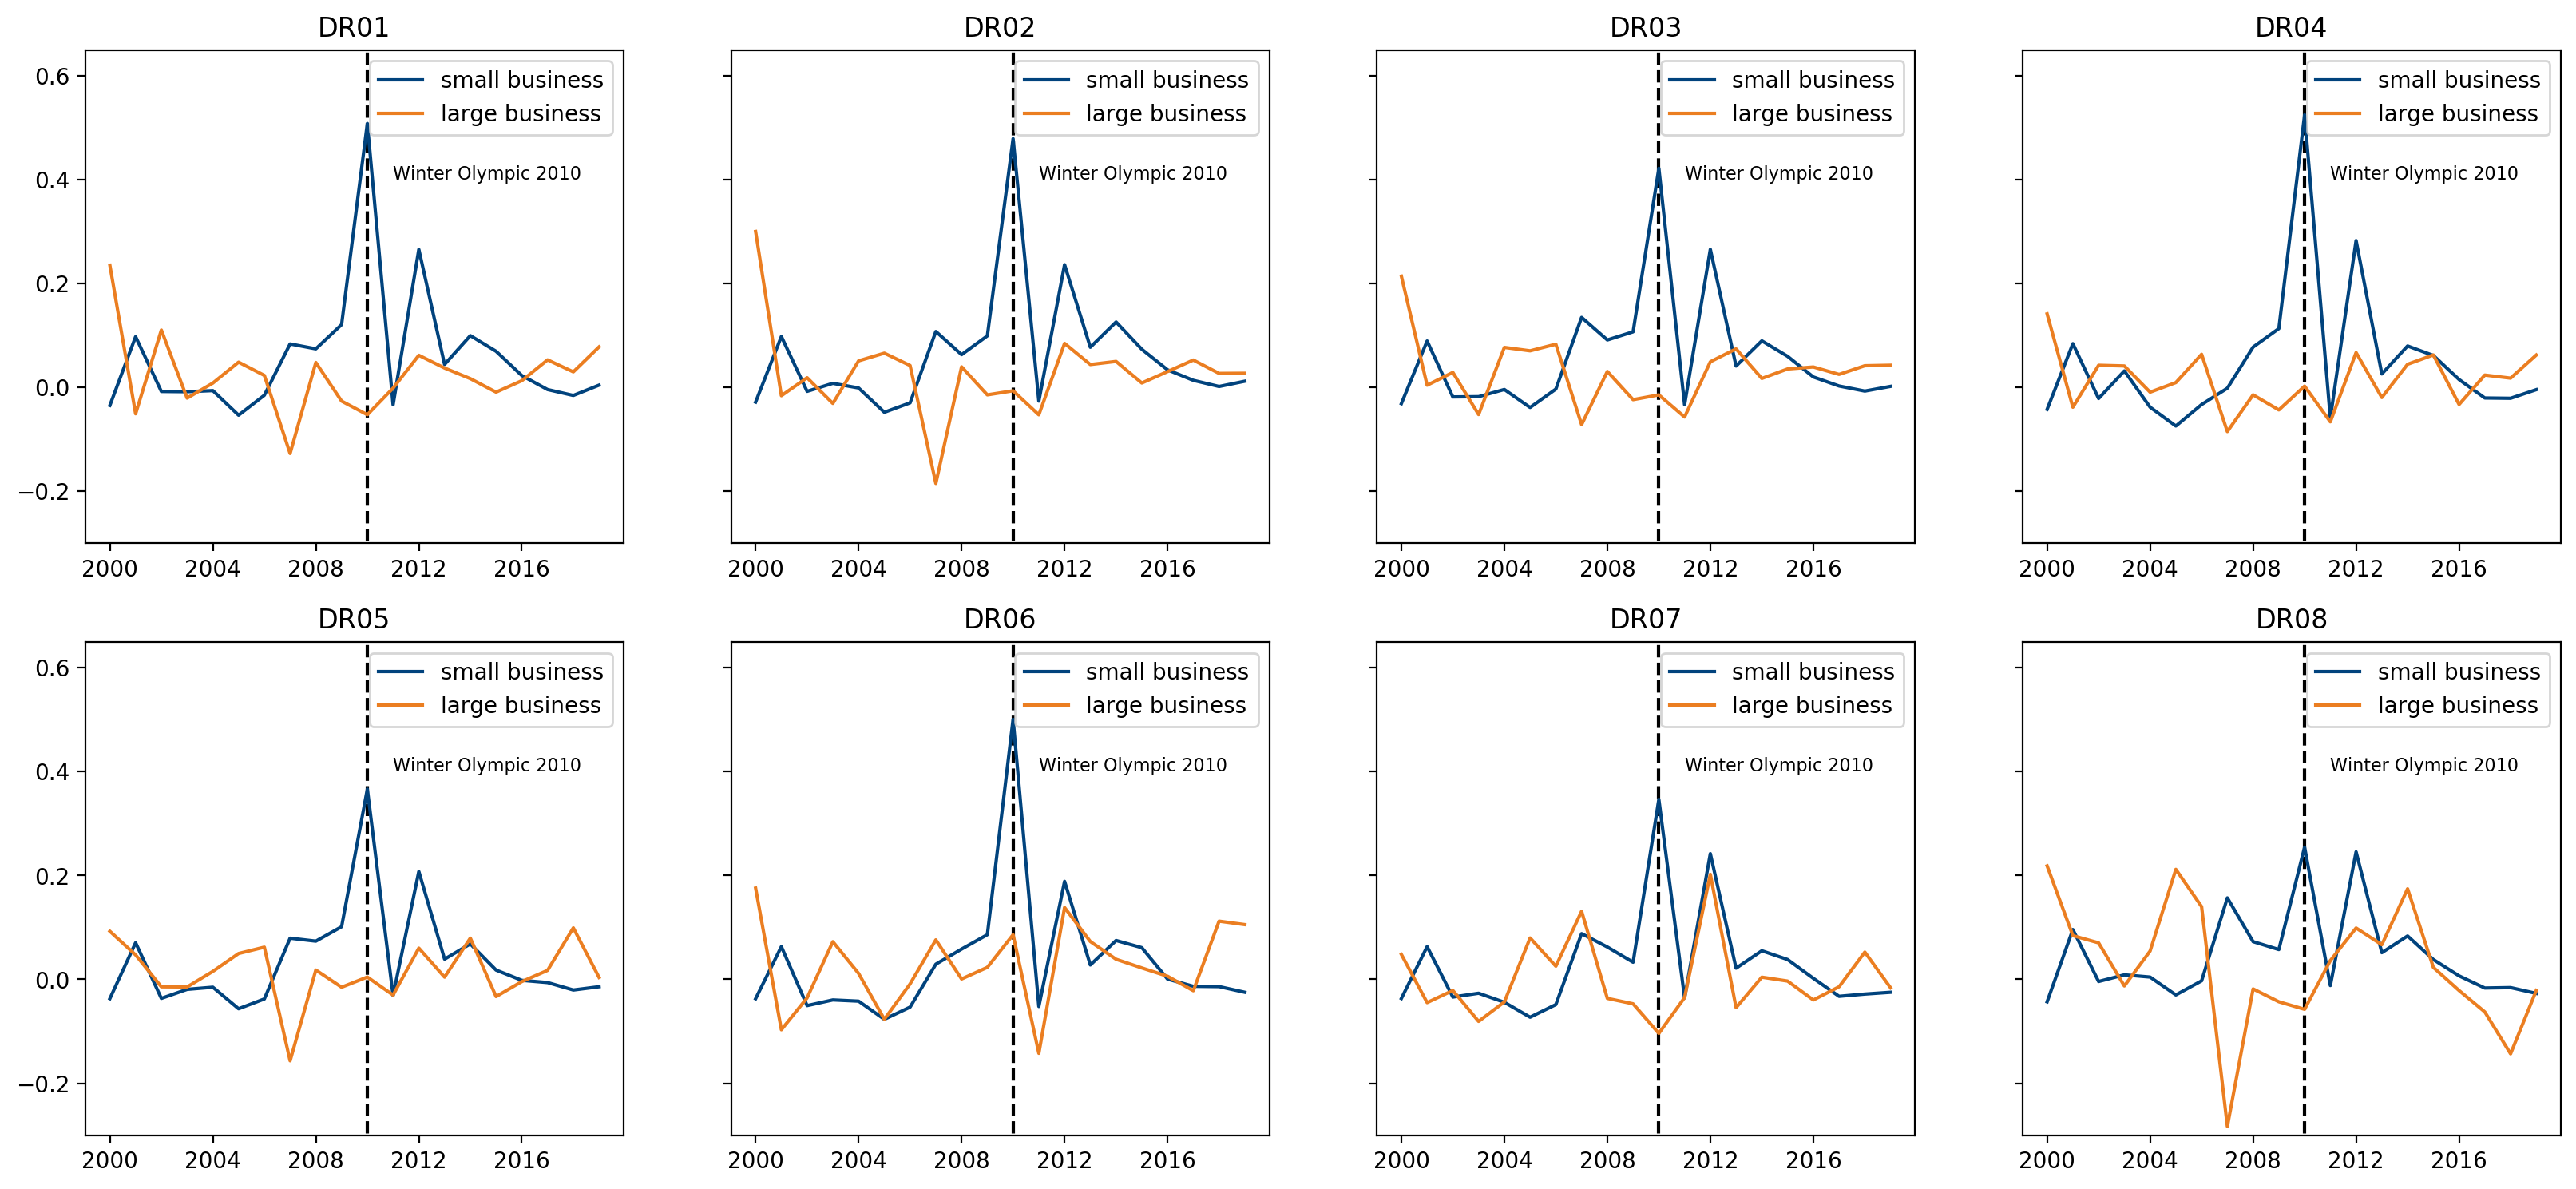

In [47]:
size = len(vbs_tr_pct_resi.index.get_level_values(1).unique())
row, col = 2, 4
fig, ax = plt.subplots(row, col, figsize = (20,9), sharey = True, dpi=200)
num = 0

for name, group in vbs_tr_pct_resi.groupby(level = 1):
    i,j = np.divmod(num, col)
    ax[i,j].xaxis.set_major_locator(plt.MaxNLocator(6))
    ax[i,j].plot(group.index.get_level_values(0), group.values[:,0], color=MY_CMAP.colors[0])
    ax[i,j].plot(group.index.get_level_values(0), group.values[:,1], color=MY_CMAP.colors[1])
    ax[i,j].vlines(2010, -0.5, 1, linestyle = "dashed")
    ax[i,j].annotate("Winter Olympic 2010", [2011,0.4],fontsize=8)
    ax[i,j].set_ylim(-0.3, 0.65)
    ax[i,j].set_title(name)
    ax[i,j].legend(group.columns)
    num += 1
plt.savefig("RegionDiff.jpg")

In [48]:
import numpy as np
from scipy.stats import f

def f_value(y1, x1, y2, x2):
    """This is the f_value function for the Chow Break test package
    Args:
        y1: Array like y-values for data preceeding the breakpoint
        x1: Array like x-values for data preceeding the breakpoint
        y2: Array like y-values for data occuring after the breakpoint
        x2: Array like x-values for data occuring after the breakpoint
    Returns:
        F-value: Float value of chow break test
    """
    def find_rss (y, x):
        """This is the subfunction to find the residual sum of squares for a given set of data
        Args:
            y: Array like y-values for data subset
            x: Array like x-values for data subset
        Returns:
            rss: Returns residual sum of squares of the linear equation represented by that data
            length: The number of n terms that the data represents
        """
        A = np.vstack([x, np.ones(len(x))]).T
        rss = np.linalg.lstsq(A, y, rcond=None)[1]
        length = len(y)
        return (rss, length)


    rss_total, n_total = find_rss(np.append(y1, y2), np.append(x1, x2))
    rss_1, n_1 = find_rss(y1, x1)
    rss_2, n_2 = find_rss(y2, x2)

    chow_nom = (rss_total - (rss_1 + rss_2)) / 2
    chow_denom = (rss_1 + rss_2) / (n_1 + n_2 - 4)
    return chow_nom / chow_denom


def p_value(y1, x1, y2, x2, **kwargs):
    F = f_value(y1, x1, y2, x2, **kwargs)
    if not F:
        return 1
    df1 = 2
    df2 = len(x1) + len(x2) - 4

    # The survival function (1-cdf) is more precise than using 1-cdf,
    # this helps when p-values are very close to zero.
    # -f.logsf would be another alternative to directly get -log(pval) instead.
    p_val = f.sf(F[0], df1, df2)
    return p_val

def QLR_AR1(x):
    x=x.reshape(-1)
    p=[]
    f=[]
    n=len(x)
    for i in range(3,n-4):
        x1,y1=x[:i],x[1:i+1]# The ith point is in x1,y1
        x2,y2=x[i+1:-1],x[i+2:]
        f.append(f_value(y1, x1, y2, x2)[0])
        p.append(p_value(y1, x1, y2, x2))
    return f,p

In [49]:
vbs_tr

small business  large business
year region_code                                
1999 DR01                44957.0           820.0
     DR02               167877.0          3751.0
     DR03                34267.0           552.0
     DR04                 9835.0           179.0
     DR05                12114.0           233.0
...                          ...             ...
2019 DR04                34167.0           251.0
     DR05                27450.0           292.0
     DR06                 8387.0           118.0
     DR07                 7756.0            70.0
     DR08                16250.0           157.0

[168 rows x 2 columns]

In [50]:
vbs_tot_pct = vbs_tr.groupby(level = 0).sum().pct_change().dropna()
print(vbs_tot_pct)
vbs_tot_pct_resi = get_resi(vbs_tot_pct, cgr)
vbs_tot_pct_resi

      small business  large business
year                                
2000       -0.000492        0.259048
2001        0.091946       -0.016917
2002       -0.002235        0.029799
2003        0.056425       -0.036136
2004        0.040972        0.035941
2005       -0.004393        0.056054
2006        0.014622        0.040582
2007        0.137921       -0.164170
2008        0.087429        0.032143
2009        0.066670       -0.013347
2010        0.524285       -0.022255
2011        0.004470       -0.049985
2012        0.252497        0.077357
2013        0.066197        0.042297
2014        0.104835        0.046158
2015        0.025115        0.015729
2016        0.022283        0.024541
2017        0.031966        0.039708
2018        0.008802        0.026611
2019        0.011050        0.035161


,small business,large business
year,,
2000,-0.031014,0.263730
2001,0.094430,-0.017298
2002,-0.011365,0.031199
2003,0.001149,-0.027657
2004,-0.004714,0.042949
2005,-0.048913,0.062884
2006,-0.024306,0.046554
2007,0.102486,-0.158734
2008,0.069527,0.034890


2006 1.4808854781341252
2010 2.264065925718737
2006 1.545802068587215
2006 1.4849401315724187
2010 2.7941053748793903
2010 1.7960791707059216
2010 2.816523274151505


IndexError: list index out of range

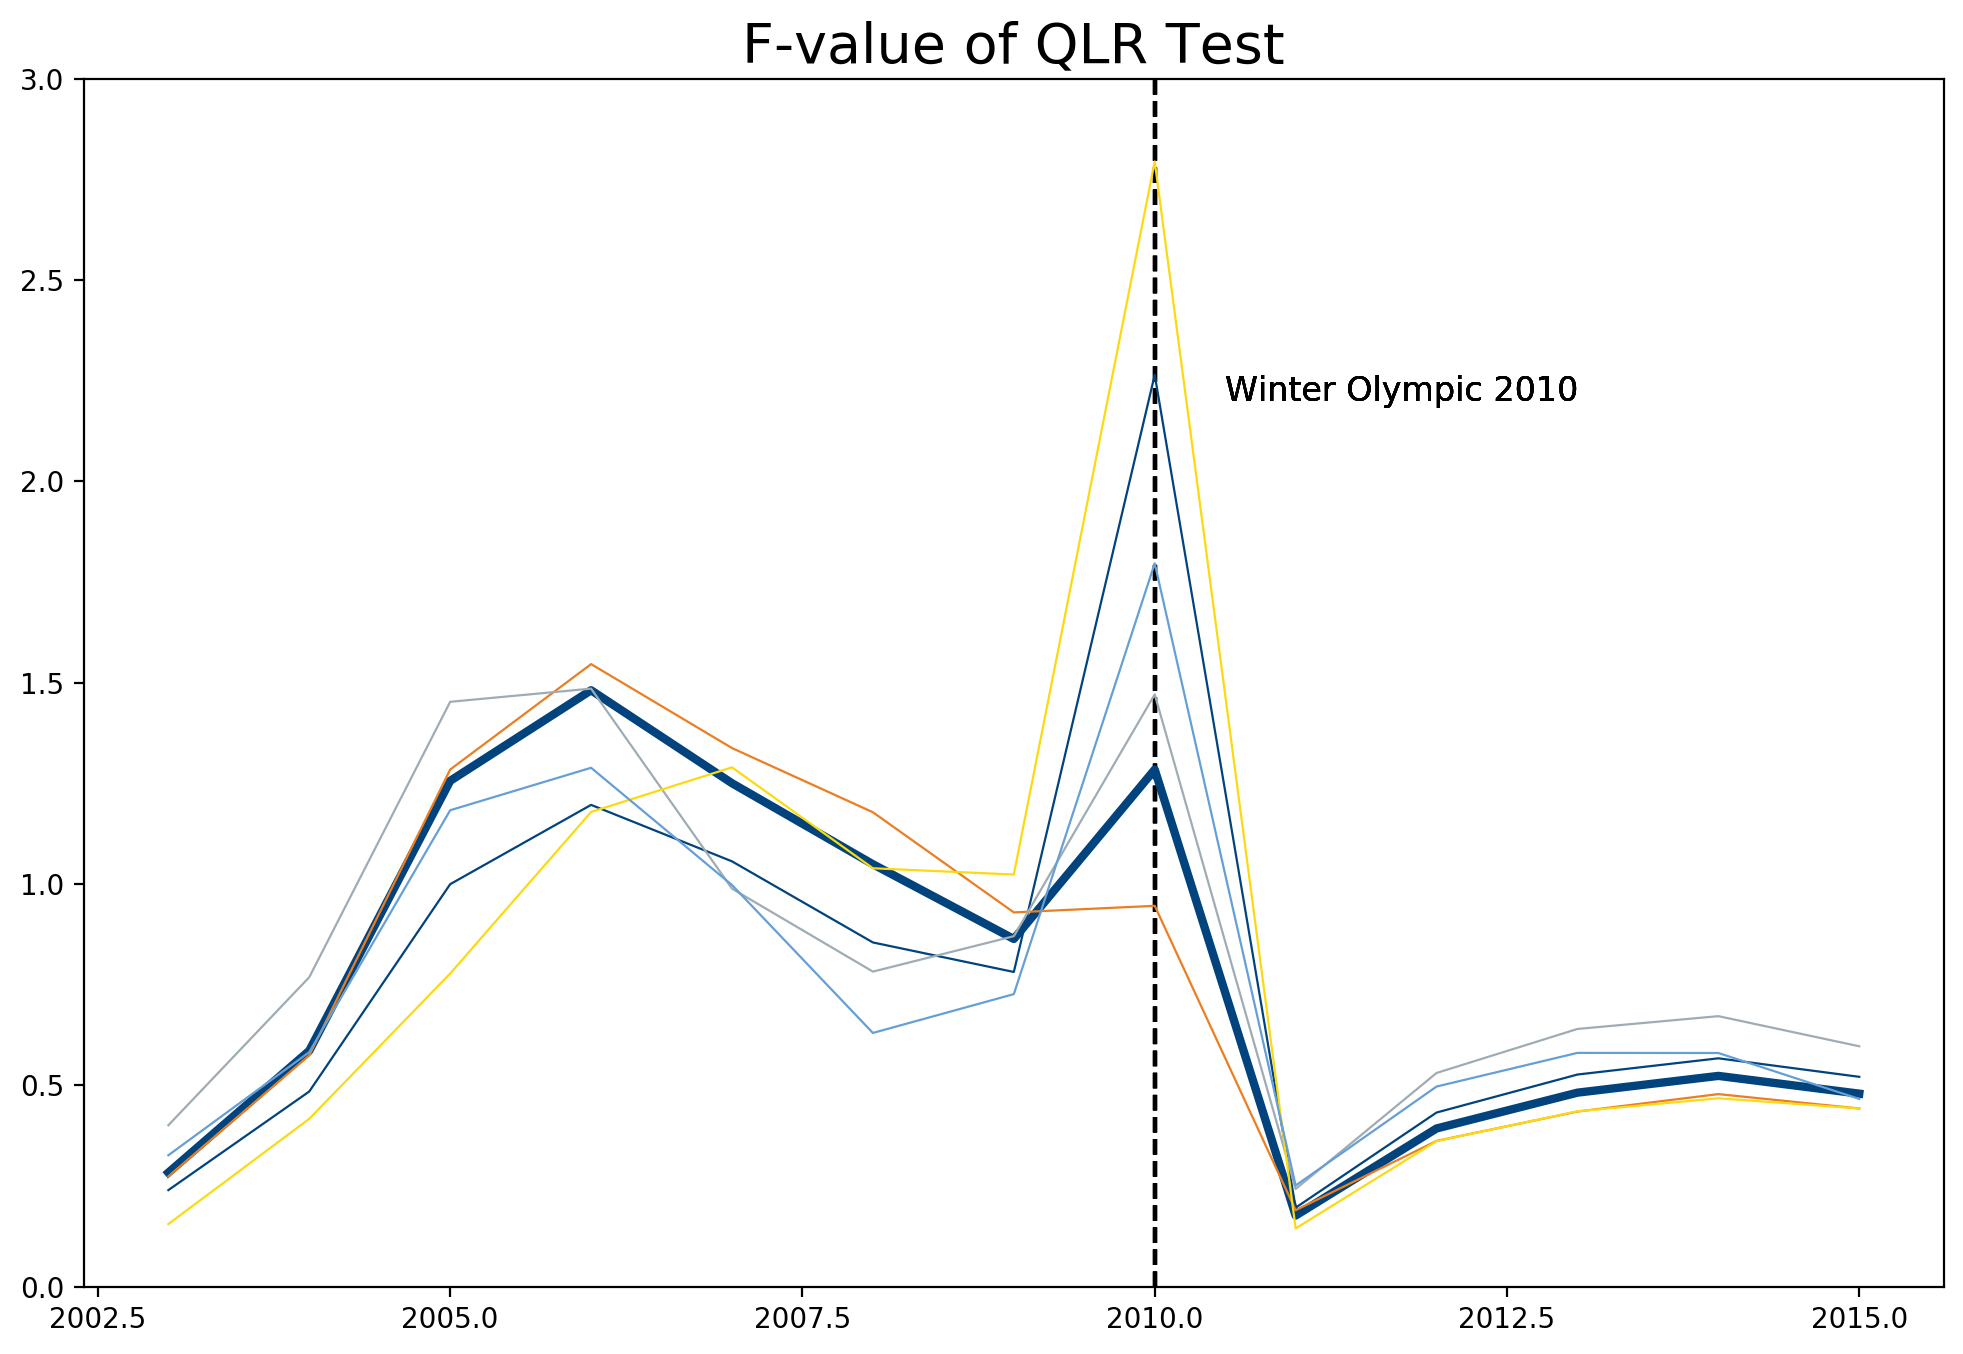

In [51]:
size = len(vbs_tr_pct_resi.index.get_level_values(1).unique())
row, col = 1, 1
fig, ax = plt.subplots(row, col, figsize = (12,8), sharey = True, dpi=200)
num = 0

x_max_list, y_max_list=[],[]

#y=vbs_tr_pct_resi.groupby(level = 0).sum()["small business"].values
y = vbs_tot_pct_resi["small business"].values
n=len(y)
f_v,p_v=QLR_AR1(y)
x=vbs_tr_pct_resi.groupby(level = 0).sum()["small business"].index[3:n-4]
ax.plot(x, f_v, linewidth=3.,color=MY_CMAP.colors[num])

x_max=x[np.argmax(f_v)]
y_max=np.max(f_v)
x_max_list.append(x_max)
y_max_list.append(y_max)
print(x_max, y_max)

for name, group in vbs_tr_pct_resi.groupby(level = 1):
    y=group.values[:,0]
    f_v,p_v=QLR_AR1(y)
    n=len(group.index.get_level_values(0))
    x=group.index.get_level_values(0)[3:n-4]
    
    x_max=x[np.argmax(f_v)]
    y_max=np.max(f_v)
    x_max_list.append(x_max)
    y_max_list.append(y_max)
    print(x_max, y_max)
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.plot(x, f_v,alpha=1, linewidth=0.8,color=MY_CMAP.colors[num])
#     ax.plot(x, p_v)
    ax.set_ylim(0., 3.)
    ax.set_xticks(x)
    ax.vlines(2010, 0., 3., linestyle = "dashed")
    
    ax.annotate("Winter Olympic 2010", [2010.5,2.2],fontsize=12)
    ax.set_title("F-value of QLR Test",fontsize=20)
    num+=1
    
for i in range(len(x_max_list)):
    x_max,y_max=x_max_list[i],y_max_list[i]
    ax.plot([x_max], [y_max], marker='.', markersize=10, color="red")
    ax.annotate('Structural Break', xy=(x_max, y_max), xycoords='data',
                 xytext=(0.15, 0.75), textcoords='axes fraction',
                 arrowprops=dict(facecolor='black', shrink=0.05, width=0.005, headwidth=5,alpha=0.3),
                 horizontalalignment='right', verticalalignment='top',fontsize=12
                 )

ax.legend(["All region"]+vbs_tr_pct_resi.index.get_level_values(1).unique().to_list())

plt.savefig("RegionSB.jpg")

# Analysis-sum over region

In [52]:
vbs_ti = vbs_m.groupby(level = [0,2]).sum()
vbs_ti_pct = vbs_ti.groupby(level = 1).pct_change().dropna(how = "all")
vbs_ti_pct

small business  large business
year business_type                                                           
2000 Accommodation & Food Services                  -0.031361        0.280861
     Admin. & Support, Waste Mgmt. & Remedtn.       -0.010471        0.175214
     Agriculture, Forestry, Fishing & Hunting        0.003534        0.079070
     Arts, Entertainment & Recreation                0.007479        0.059524
     Construction                                   -0.034347        0.418960
...                                                       ...             ...
2019 Retail Trade                                   -0.024269        0.080791
     Transportation & Warehousing (48-49)            0.069411        0.086207
     Unclassified                                    0.045044       -0.068376
     Utilities                                      -0.057895        0.157895
     Wholesale Trade                                -0.029988        0.041558

[405 rows x 2 columns]

In [53]:
vbs_ti_pct_resi = vbs_ti_pct.groupby(level = 1).apply(get_resi, cgr_range)

In [54]:
size = len(vbs_ti_pct_resi.index.get_level_values(1).unique())
print(vbs_ti_pct_resi.index.get_level_values(1).unique())
size

Index(['Accommodation & Food Services',
       'Admin. & Support, Waste Mgmt. & Remedtn.',
       'Agriculture, Forestry, Fishing & Hunting',
       'Arts, Entertainment & Recreation', 'Construction',
       'Educational Services', 'Finance & Insurance',
       'Health Care & Social Assistance', 'Information & Cultural Industries',
       'Management of Companies & Enterprises', 'Manufacturing',
       'Mining & Oil & Gas Extraction',
       'Other Services (excl. Public Administration)',
       'Professional, Scientific & Technical Services',
       'Public Administration', 'Real Estate & Rental & Leasing',
       'Retail Trade', 'Transportation & Warehousing (48-49)', 'Utilities',
       'Wholesale Trade', 'Unclassified'],
      dtype='object', name='business_type')


21

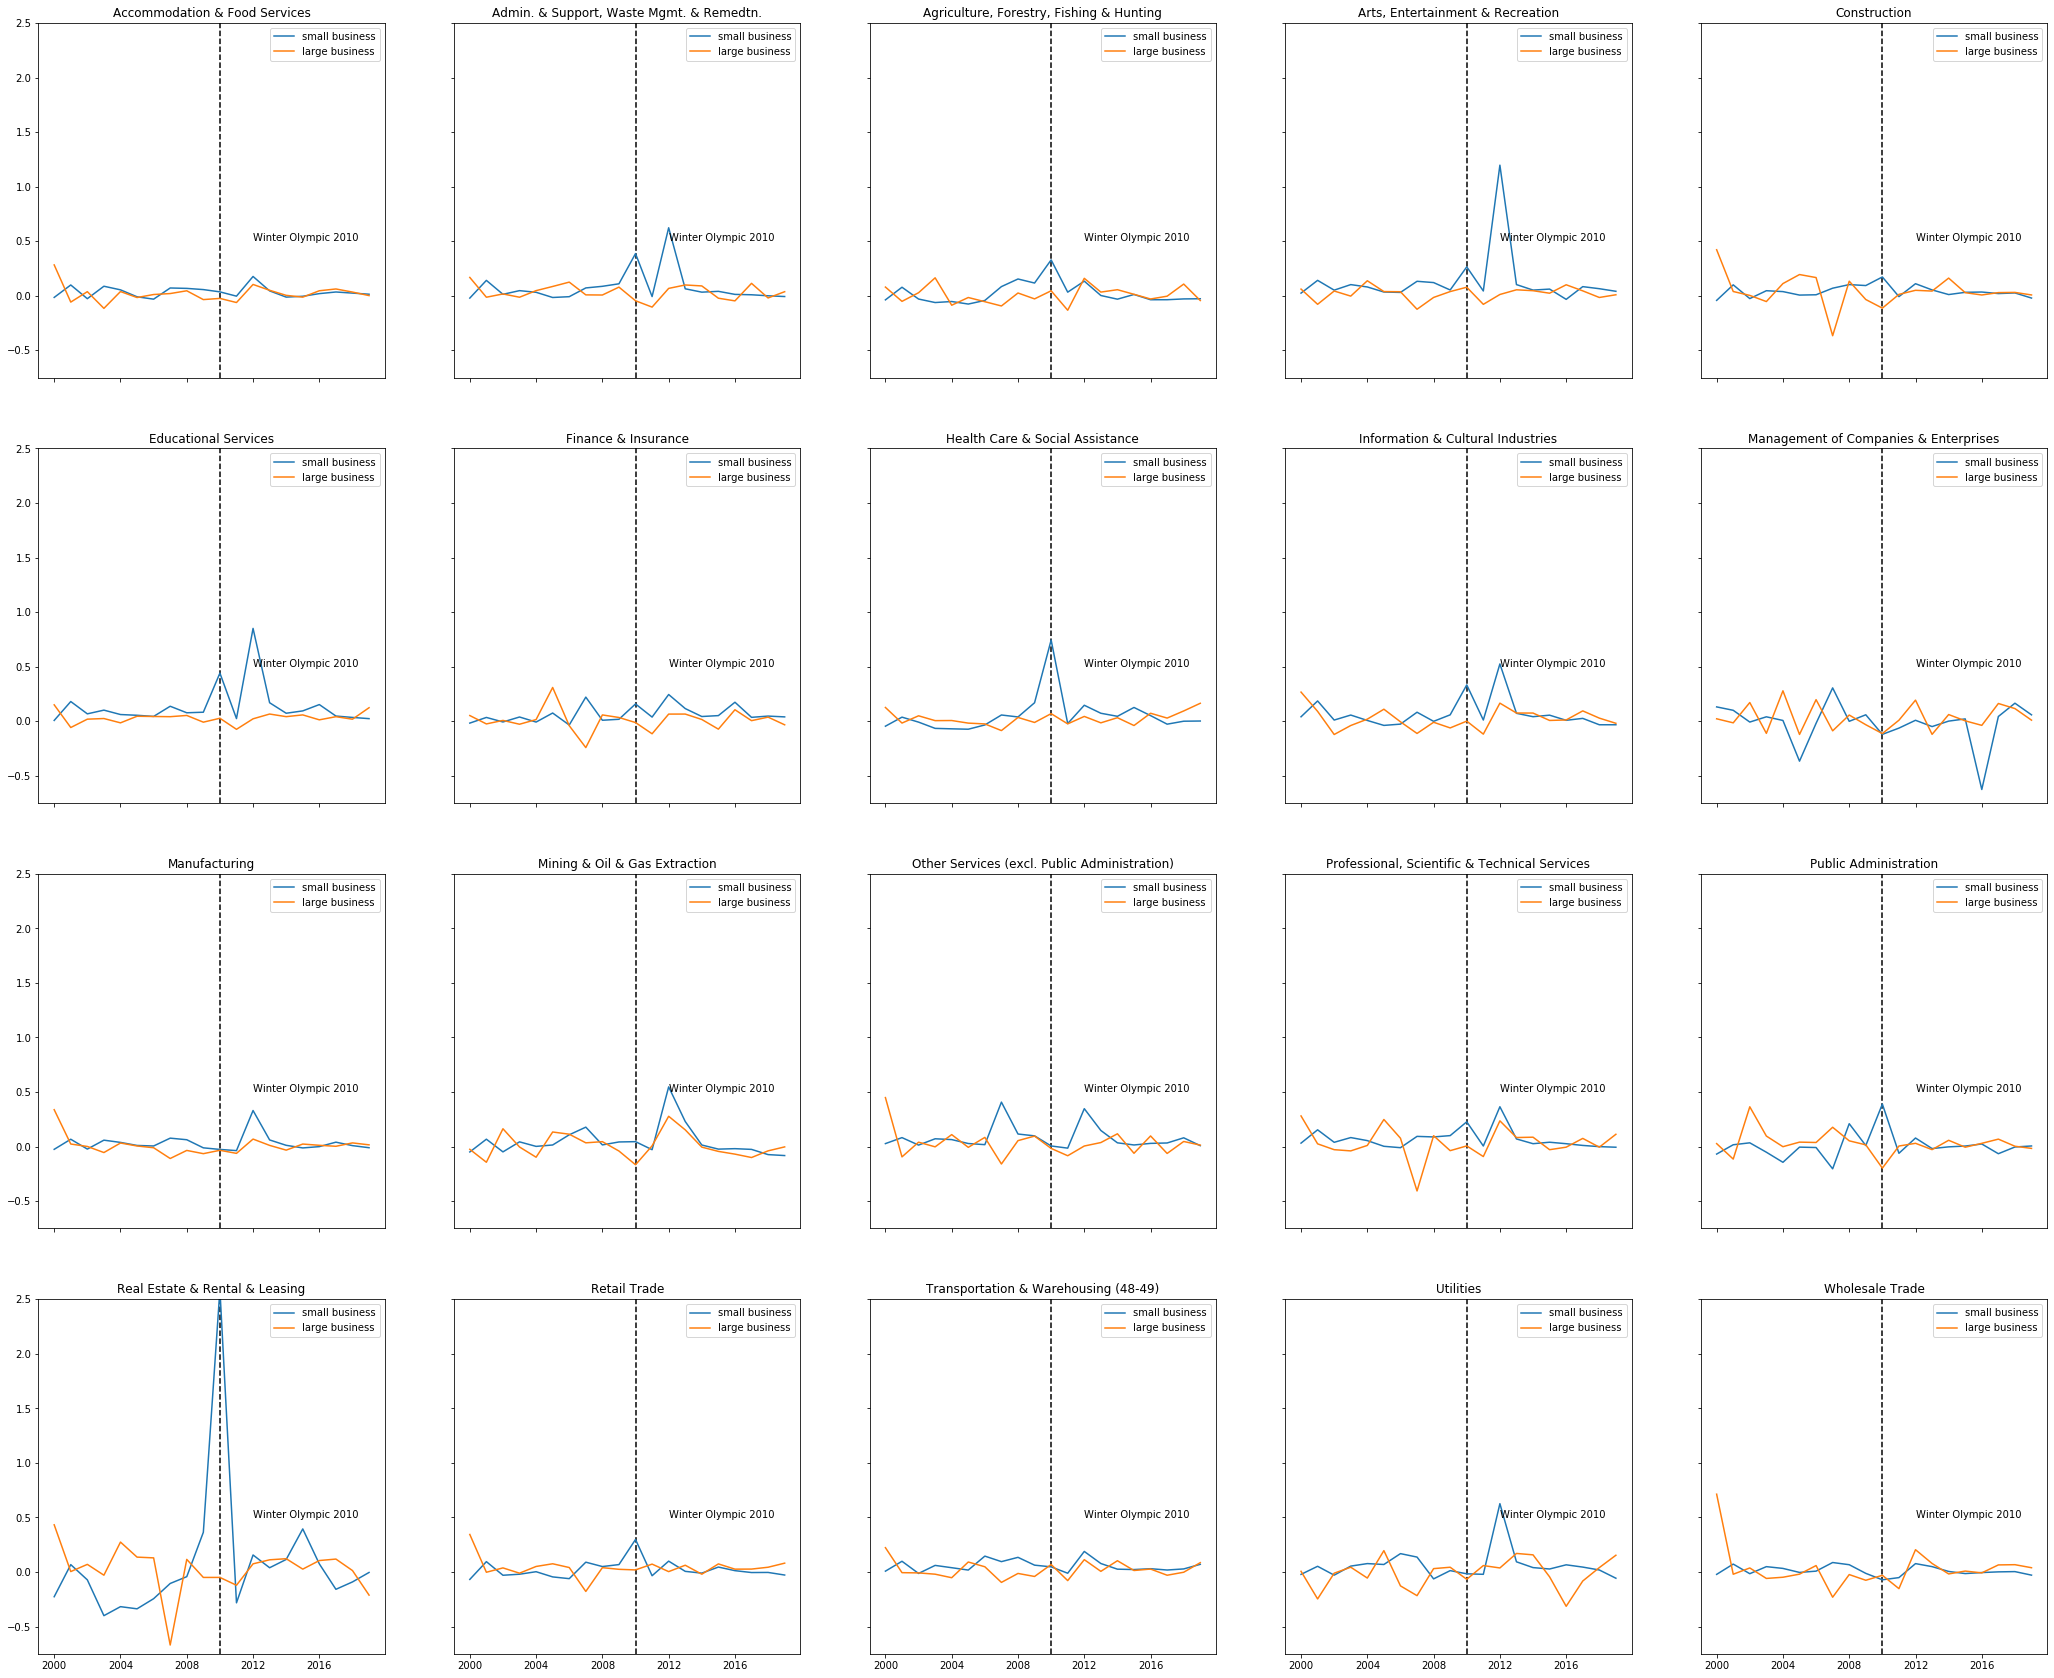

In [55]:
row, col = 4, 5
fig, ax = plt.subplots(row, col, figsize = (36,30), sharey = True, sharex = True)
num = 0
small_business_df=pd.DataFrame()

for name, group in vbs_ti_pct_resi.groupby(level = 1):
    i,j = np.divmod(num, col)
    if name=='Unclassified':
        continue
    
    small_business_df[name]=group["small business"].values
    small_business_df.index=group.index.get_level_values(0)

    ax[i,j].xaxis.set_major_locator(plt.MaxNLocator(6))
    ax[i,j].plot(group.index.get_level_values(0), group.values)
    ax[i,j].vlines(2010, -0.75, 2.5, linestyle = "dashed")
    ax[i,j].annotate("Winter Olympic 2010", [2012,0.5])
    ax[i,j].set_ylim(-0.75, 2.5)
    ax[i,j].set_title(name)
    ax[i,j].legend(group.columns)
    num += 1

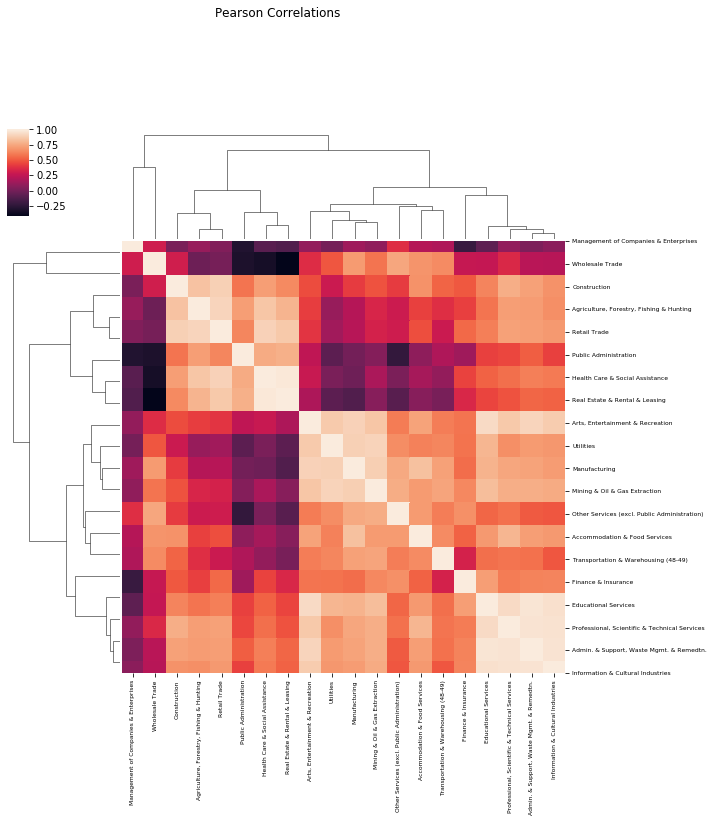

In [56]:
small_business_df
pearson_corr  = small_business_df.corr()

g=sns.clustermap(pearson_corr, method="average",yticklabels=True,xticklabels=True)
g.fig.suptitle('Pearson Correlations', y=1.05)
ax = g.ax_heatmap
ax.tick_params(axis='y',labelsize=6) 
ax.tick_params(axis='x',labelsize=6)
plt.show()

In [57]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,assign_labels="discretize",affinity="precomputed",random_state=42).fit_predict(pearson_corr)
pearson_corr.columns[clustering==1],pearson_corr.columns[clustering==0]

(Index(['Admin. & Support, Waste Mgmt. & Remedtn.',
        'Agriculture, Forestry, Fishing & Hunting', 'Construction',
        'Educational Services', 'Finance & Insurance',
        'Health Care & Social Assistance', 'Information & Cultural Industries',
        'Professional, Scientific & Technical Services',
        'Public Administration', 'Real Estate & Rental & Leasing',
        'Retail Trade'],
       dtype='object'),
 Index(['Accommodation & Food Services', 'Arts, Entertainment & Recreation',
        'Management of Companies & Enterprises', 'Manufacturing',
        'Mining & Oil & Gas Extraction',
        'Other Services (excl. Public Administration)',
        'Transportation & Warehousing (48-49)', 'Utilities', 'Wholesale Trade'],
       dtype='object'))

# Two Cluster Analysis

In [58]:
vbs_ti = vbs_m.groupby(level = [0,4]).sum()
vbs_ti_pct = vbs_ti.groupby(level = [1]).pct_change().dropna(how = "all")
vbs_ti_pct

small business  large business
year cluster_type                                
2000 cluster1           -0.000937        0.224574
     cluster2            0.000407        0.300882
2001 cluster1            0.093632       -0.005674
     cluster2            0.088543       -0.029758
2002 cluster1            0.001986        0.029831
     cluster2           -0.010798        0.029760
2003 cluster1            0.059945       -0.008060
     cluster2            0.049194       -0.069006
2004 cluster1            0.045537        0.036821
     cluster2            0.031495        0.034843
2005 cluster1            0.017053        0.101151
     cluster2           -0.049521       -0.000306
2006 cluster1            0.015048        0.048710
     cluster2            0.013663        0.029394
2007 cluster1            0.124902       -0.219724
     cluster2            0.167276       -0.086258
2008 cluster1            0.091740        0.052460
     cluster2            0.078062        0.007812
2009 cluster1            0.069745        0.004132
     cluster2            0.059905       -0.035207
2010 cluster1            0.765602       -0.023663
     cluster2           -0.011634       -0.020422
2011 cluster1            0.013420       -0.033983
     cluster2           -0.031035       -0.070745
2012 cluster1            0.242458        0.060267
     cluster2            0.294148        0.100405
2013 cluster1            0.062173        0.049126
     cluster2            0.082227        0.033422
2014 cluster1            0.028688        0.051238
     cluster2            0.024572        0.016171
2015 Unclassified       -0.012143        0.930556
     cluster1            0.027063        0.013759
     cluster2            0.031217       -0.002546
2016 Unclassified        0.061731        0.028777
     cluster1            0.031761        0.022774
     cluster2           -0.028715        0.026803
2017 Unclassified        0.055469        0.160839
     cluster1            0.032112        0.043635
     cluster2            0.022279        0.028900
2018 Unclassified       -0.125671       -0.295181
     cluster1            0.014085        0.033405
     cluster2            0.040288        0.033223
2019 Unclassified        0.045044       -0.068376
     cluster1            0.006729        0.048801
     cluster2            0.017320        0.019585

In [59]:
vbs_ti_pct_resi = vbs_ti_pct.groupby(level = 1).apply(get_resi, cgr_range)
vbs_ti_pct_resi

small business  large business
year cluster_type                                
2000 cluster1           -0.056388        0.229023
     cluster2            0.013938        0.301949
2001 cluster1            0.098144       -0.006037
     cluster2            0.087441       -0.029845
2002 cluster1           -0.014600        0.031162
     cluster2           -0.006750        0.030080
2003 cluster1           -0.040480       -0.000003
     cluster2            0.073701       -0.067072
2004 cluster1           -0.037464        0.043480
     cluster2            0.051750        0.036442
2005 cluster1           -0.063828        0.107641
     cluster2           -0.029784        0.001252
2006 cluster1           -0.055674        0.054384
     cluster2            0.030921        0.030756
2007 cluster1            0.060524       -0.214559
     cluster2            0.182986       -0.085018
2008 cluster1            0.059215        0.055070
     cluster2            0.086000        0.008439
2009 cluster1            0.134796       -0.001087
     cluster2            0.044031       -0.036459
2010 cluster1            0.665541       -0.015634
     cluster2            0.012784       -0.018495
2011 cluster1           -0.048057       -0.029051
     cluster2           -0.016032       -0.069561
2012 cluster1            0.229783        0.061284
     cluster2            0.297242        0.100649
2013 cluster1            0.056439        0.049586
     cluster2            0.083626        0.033533
2014 cluster1            0.042075        0.050164
     cluster2            0.021305        0.015913
2015 Unclassified       -0.009300        0.300881
     cluster1            0.104734        0.007527
     cluster2            0.012263       -0.004042
2016 Unclassified        0.062102       -0.053481
     cluster1            0.041908        0.021960
     cluster2           -0.031191        0.026607
2017 Unclassified        0.053820        0.526181
     cluster1           -0.012953        0.047251
     cluster2            0.033276        0.029768
2018 Unclassified       -0.126505       -0.110488
     cluster1           -0.008697        0.035233
     cluster2            0.045847        0.033661
2019 Unclassified        0.044801       -0.014449
     cluster1            0.000077        0.049335
     cluster2            0.018943        0.019713

In [60]:
size = len(vbs_ti_pct_resi.index.get_level_values(1).unique())
size

3

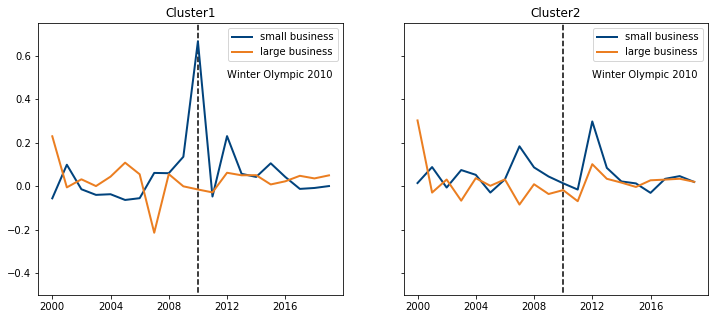

In [61]:
row, col = 1,2
fig, ax = plt.subplots(row, col, figsize = (12,5), sharey = True, sharex = True)
num = 0

for name, group in vbs_ti_pct_resi.groupby(level = 1):
    if name=="Unclassified":
        continue
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(6))
    ax[num].plot(group.index.get_level_values(0), group.values[:,0], linewidth = 2, color=MY_CMAP.colors[0])
    ax[num].plot(group.index.get_level_values(0), group.values[:,1], linewidth = 2, color=MY_CMAP.colors[1])
    #ax[num].plot(group.index.get_level_values(0), group.values, color = MY_CMAP.colors)
    ax[num].vlines(2010, -1, 1, linestyle = "dashed")
    ax[num].set_ylim([-0.5,0.75])
    ax[num].annotate("Winter Olympic 2010", [2012,0.5])
    ax[num].set_title(name.capitalize())
    ax[num].legend(group.columns)
    num += 1

In [62]:
"aaa".capitalize()

'Aaa'

[2010] [3.074355202496752]
[2012] [1.0067753068997953]


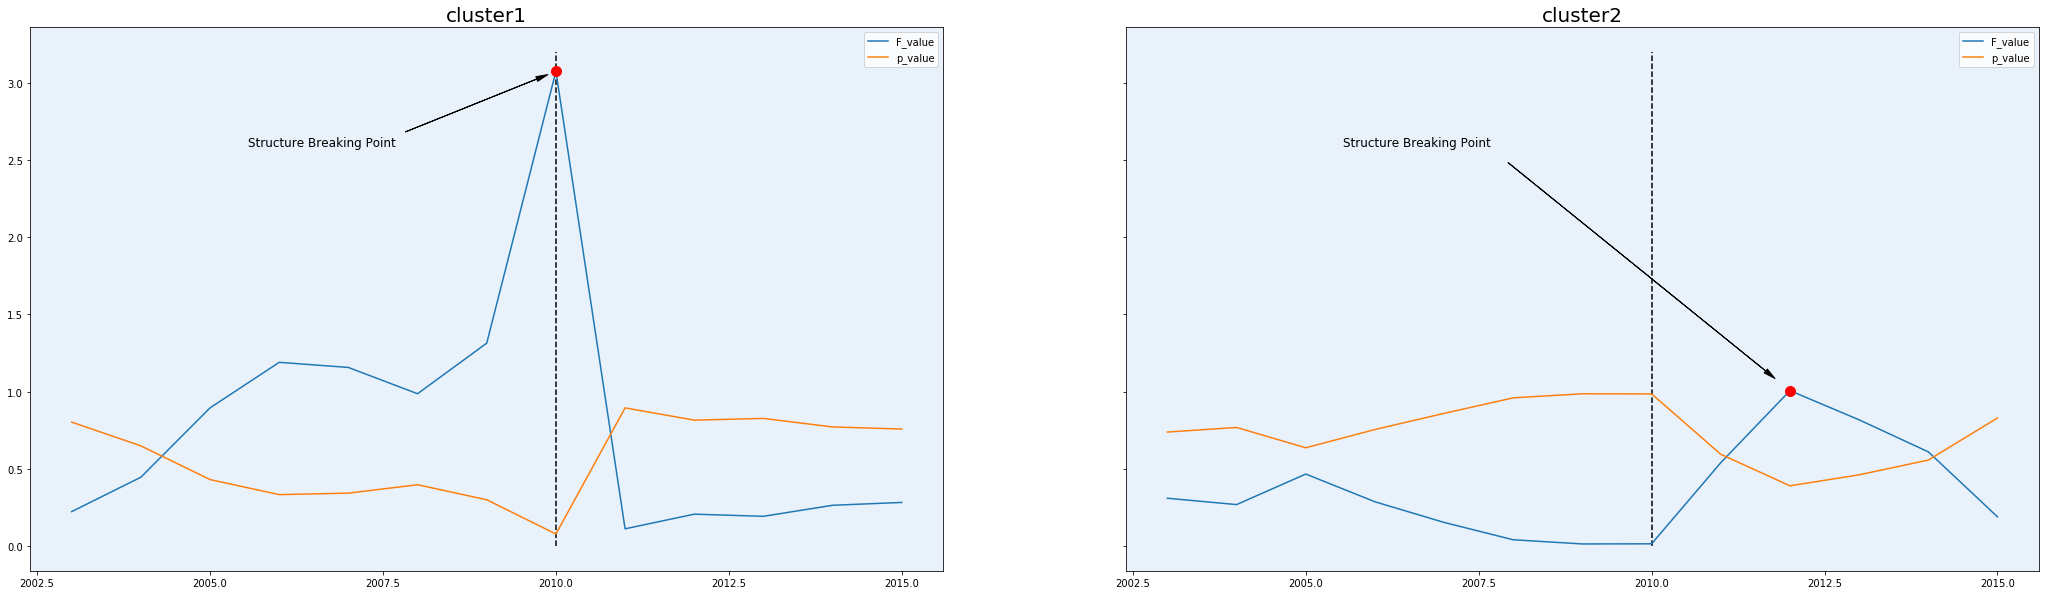

In [69]:
row, col = 1,2
fig, ax = plt.subplots(row, col, figsize = (36,10), sharey = True, sharex = True)
num = 0

for name, group in vbs_ti_pct_resi.groupby(level = 1):
    if name=="Unclassified":
        continue
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(6))
    y=group.values[:,0]
    f_v,p_v=QLR_AR1(y)
    n=len(group.index.get_level_values(0))
    x=group.index.get_level_values(0)[3:n-4]
    
    ax[num].plot(x, f_v)
    ax[num].plot(x, p_v)
    x_max=x[np.argmax(f_v)]
    y_max=np.max(f_v)
    print([x_max], [y_max])
    ax[num].plot([x_max], [y_max], marker='.', markersize=20, color="red")
    ax[num].annotate('Structure Breaking Point', xy=(x_max, y_max), xycoords='data',
                 xytext=(0.4, 0.8), textcoords='axes fraction',
                 arrowprops=dict(facecolor='black', shrink=0.05, width=0.01, headwidth=5),
                 horizontalalignment='right', verticalalignment='top',fontsize=12
                 )
    
    ax[num].vlines(2010, 0., 3.2, linestyle = "dashed")
    ax[num].set_title(name,fontsize=20)
    ax[num].legend(["F_value","p_value"])
    
    ax[num].set_facecolor('#E9F1FA')
    num += 1

In [64]:
vbs_ti = vbs_m.groupby(level = [0,1,4]).sum()
vbs_sector_pct=vbs_ti/vbs_m.groupby(level = [0,1]).sum()
vbs_sector_pct

small business  large business
year region_code cluster_type                                
1999 DR01        cluster1            0.697934        0.625610
                 cluster2            0.302066        0.374390
     DR02        cluster1            0.664516        0.528126
                 cluster2            0.335484        0.471874
     DR03        cluster1            0.673505        0.528986
...                                       ...             ...
2019 DR07        cluster1            0.739170        0.600000
                 cluster2            0.211449        0.400000
     DR08        Unclassified        0.051077        0.000000
                 cluster1            0.719323        0.592357
                 cluster2            0.229600        0.407643

[384 rows x 2 columns]

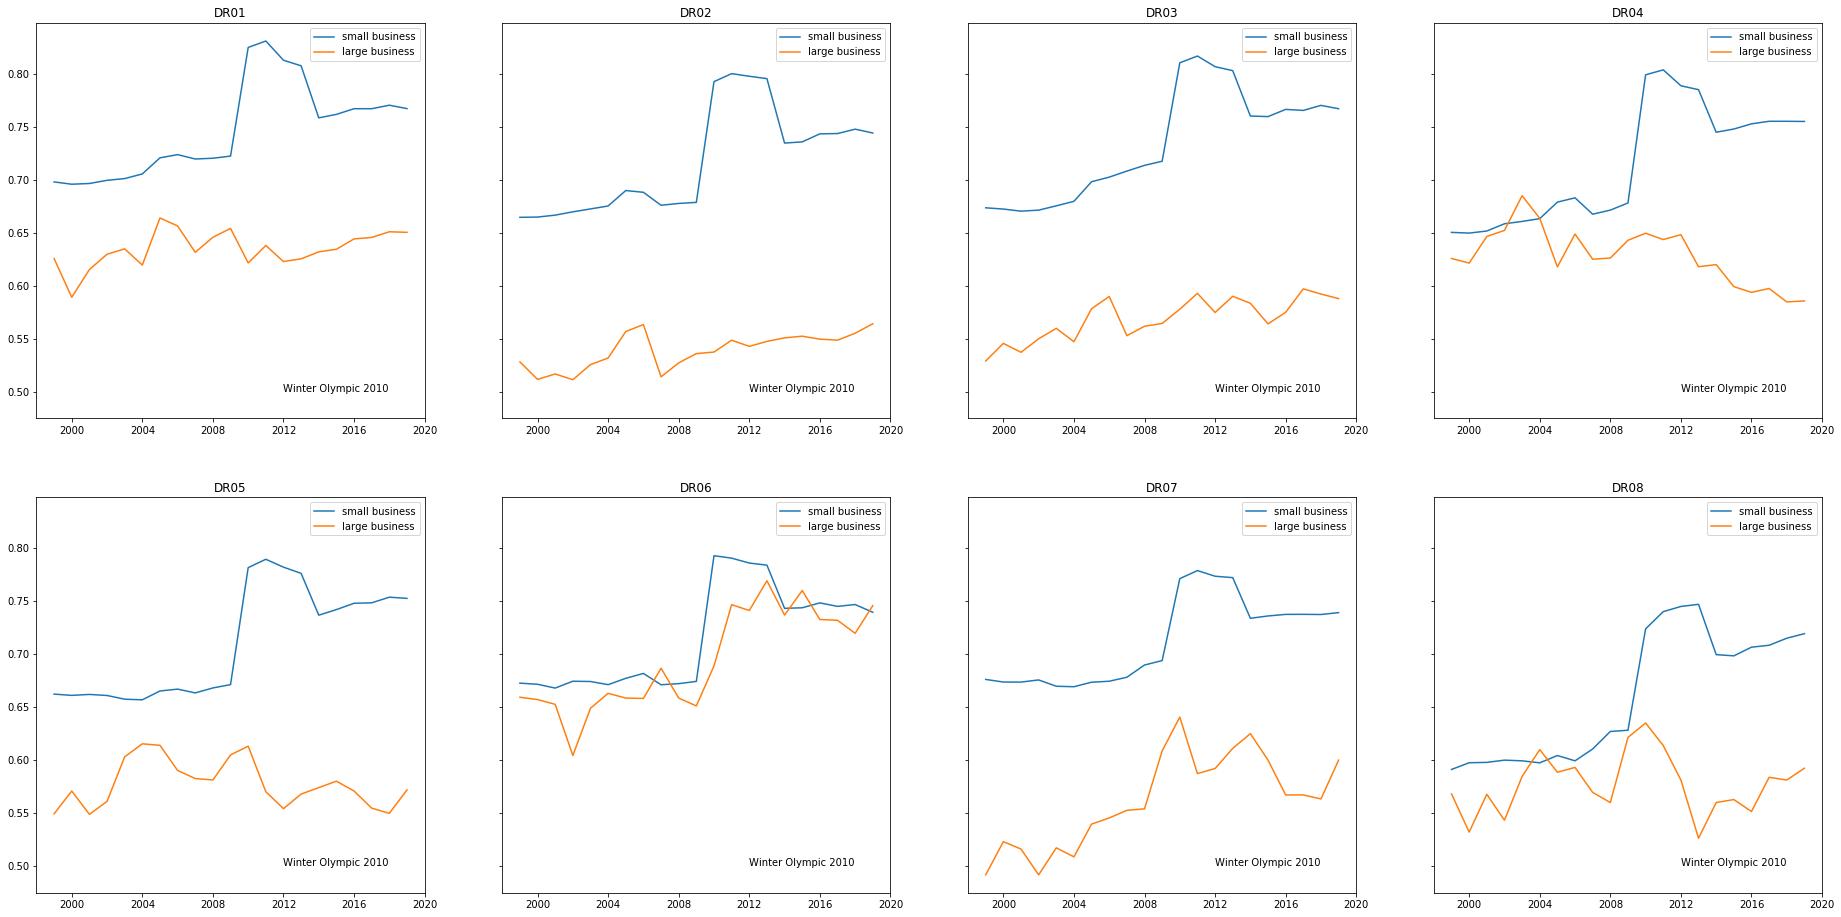

In [65]:
size = len(vbs_sector_pct.index.get_level_values(1).unique())
row, col = 2, 4
fig, ax = plt.subplots(row, col, figsize = (32,16), sharey = True)
num = 0

for name, group in vbs_sector_pct.groupby(level = 1):
    group=group.xs('cluster1', level='cluster_type')
    i,j = np.divmod(num, col)
    ax[i,j].xaxis.set_major_locator(plt.MaxNLocator(6))
    ax[i,j].plot(group.index.get_level_values(0), group.values)
#     ax[i,j].vlines(2010, 0., 0.5, linestyle = "dashed")
    ax[i,j].annotate("Winter Olympic 2010", [2012,0.5])
    ax[i,j].set_title(name)
    ax[i,j].legend(group.columns)
    num += 1